# Introduction Scikit-Learn

Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation. A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

---

## Data Representation in Scikit-Learn

### Data as table

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Idea!!! Rows as samples and Columns as features.

### Features matrix

Table as feature matrix.

This table layout makes clear that the information can be thought of as a twodimensional numerical array or matrix, which we will call the features matrix. By convention, this features matrix is often stored in a variable named X. The features matrix is assumed to be two-dimensional, with shape [n_samples, n_features], and is most often contained in a NumPy array or a Pandas DataFrame, though some Scikit-Learn models also accept SciPy sparse matrices.

The samples (i.e., rows) always refer to the individual objects described by the dataset. For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements. <br> <br>
The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner. Features are generally real-valued, but may be Boolean or discrete-valued in some cases

### Target array

In addition to the feature matrix X, we also generally work with a label or target array, which by convention we will usually call y. The target array is usually one dimensional, with length n_samples, and is generally contained in a NumPy array or Pandas Series. The target array may have continuous numerical values, or discrete classes/labels. While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional [n_samples, n_targets] target array, we will primarily be working with the common case of a one-dimensional target array.

Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to predict from the data: in statistical terms, it is the dependent variable.

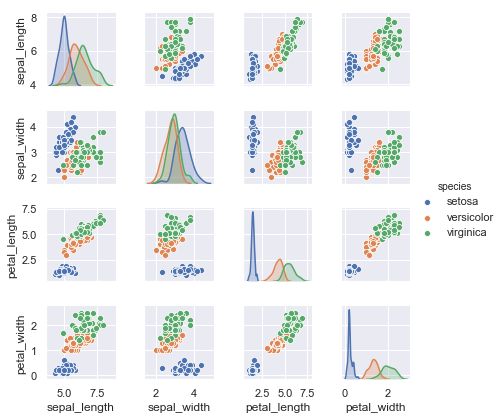

In [2]:
# use seaborn to visualize
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', height=1.5);

In [3]:
# Extract data from DataFrame to Numpy array
X_iris = iris.drop('species', axis=1)
X_iris.shape


(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

The generalized idea:
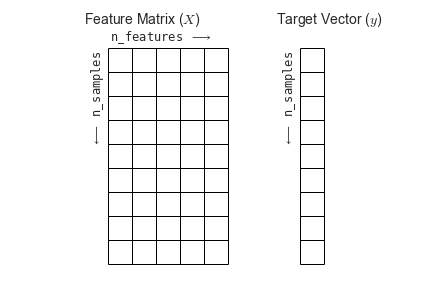

---

## Scikit-Learn's Estimator API

The Scikit-Learn API is designed with the following guiding principles:<br>

- Consistency <br>
All objects share a common interface drawn from a limited set of methods, with
consistent documentation.

- Inspection <br>
All specified parameter values are exposed as public attributes.

- Limited object hierarchy <br>
Only algorithms are represented by Python classes; datasets are represented in
standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and
parameter names use standard Python strings.

- Composition <br>
Many machine learning tasks can be expressed as sequences of more fundamental
algorithms, and Scikit-Learn makes use of this wherever possible.
- Sensible defaults: <br>
When models require user-specified parameters, the library defines an appropriate default value.

### Basics of the API

The common steps of using Scikit-Learn estimator API: <br>

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn. <br>

2. Choose model hyperparameters by instantiating this class with desired values. <br>

3. Arrange data into a features matrix and target vector. <br>

4. Fit the model to the data by calling fit() instance method. <br>

5. Apply the model to new data. Preditct by using predict() instance method.

### Supervised learning example: Simple linear regression

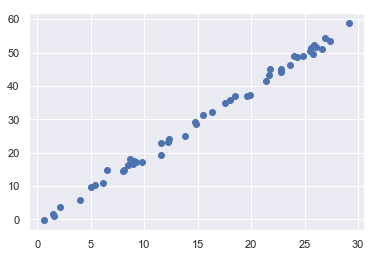

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(21)
x = 30 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

Now, we try to apply the simple linear regression to out dataset

1. Choose a class model! <br>
In Scikit-Learn, every class of model is represented by a Python class.

In [6]:
from sklearn.linear_model import LinearRegression

2. Choose model hyperparameters! <br>
An important point is that a class of model is not the same as an instance of a model.

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

3. Arrange data into a features matrix and target vector. <br>

In [8]:
# turn to features matrix
X = x[:, np.newaxis]
X.shape

(50, 1)

4. Fit the model to our data.

In [9]:
model.fit(X, y) # our model fit and learn our data for further prediction

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in modelspecific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores; for example, in this linear model, we have the following:

In [10]:
model.coef_ # the coefficient of linear model. a of y = ax + b (slope)

array([2.02839732])

In [11]:
model.intercept_ # the constant of linear model. b of y = ax + b (intercept)

-1.2540704688998368

5. Predict label for unknown data

For making it simple, we use the test set as simple line

In [12]:
xfit = np.linspace(-1, 11) # data that we want to predict
# Turn the xfit into features matrix
Xfit = x[:, np.newaxis]
yfit = model.predict(Xfit)

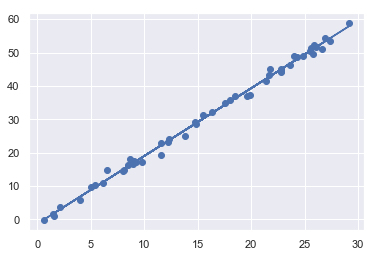

In [13]:
plt.scatter(x, y)
plt.plot(Xfit, yfit);

### Supervised learning example: Iris classification

Now, we are using gaussian naive bayes. Fast and no hyperparameters to choose and good for baseline classification, before exploring the more sophisticated models

In [14]:
# splitting the iris dataset into train set and test set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [15]:
from sklearn.naive_bayes import GaussianNB    # 1. choose model class
model = GaussianNB()                          # 2. nstantiate model
model.fit(Xtrain, ytrain)                     # 3. fit model to data
y_model = model.predict(Xtest)                # 4. predict on new data

In [16]:
# see fraction of predicted label that match their true value
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let’s take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. Recall that the Iris data is four dimensional: there are four features recorded for each sample. <br> <br>
Here we use Principle Component Analysis (PCA)

In [17]:
from sklearn.decomposition import PCA        # 1. choose model class
model = PCA(n_components=2)                  # 2. instantiate model with hyperparameters
model.fit(X_iris)                            # 3. fit the data
X_2D = model.transform(X_iris)               # 4. transform the data to two dimensions

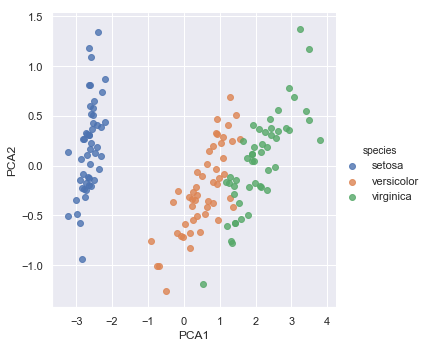

In [18]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species', fit_reg=False);

### Unsupervised learning: Iris clustering

A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use a powerful clustering method called a Gaussian mixture model (GMM),

In [19]:
from sklearn.mixture import GaussianMixture         # 1. choosing the model
model = GaussianMixture(n_components=3,             # 2. instantiate model with hyperparameters
            covariance_type='full')
model.fit(X_iris)                                   # 3. fit the data
y_gmm = model.predict(X_iris)                       # 4. determine cluster labels

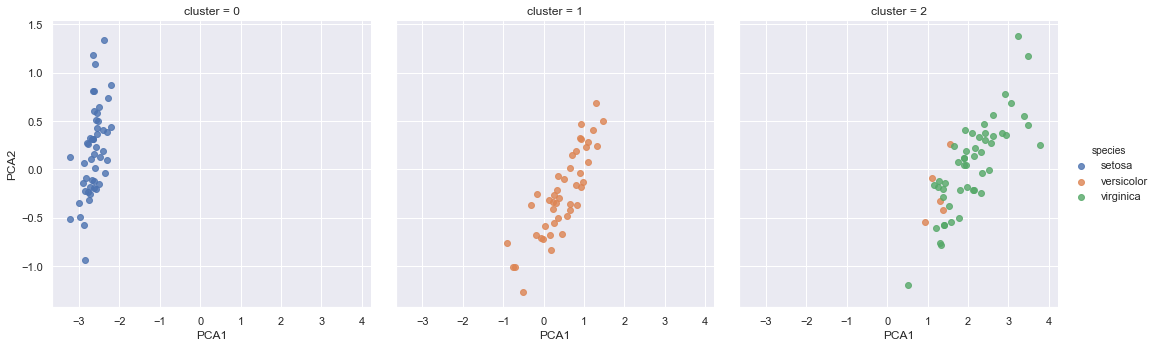

In [35]:
# add new features to iris
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species', 
           col='cluster', fit_reg=False);
# the parameter col makes the figure split based on its classification

---

## Application: Exploring Handwritten Digits

### Loading and visualizing the digits data

In [21]:
from sklearn.datasets import load_digits

In [22]:
digits = load_digits()

In [23]:
digits.images.shape

(1797, 8, 8)

The images data is three-dimensional array: 1797 samples, each consisting of an 8x8 grid of pixels.

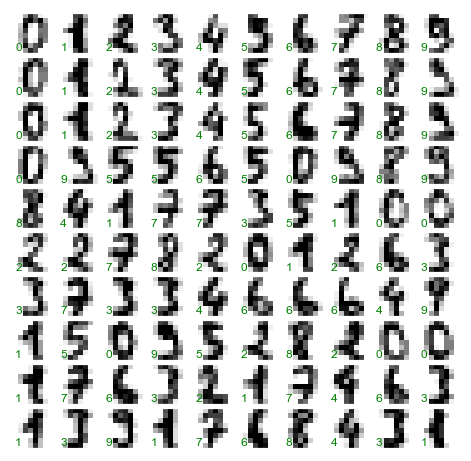

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(ax.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')
plt.show()

In [25]:
X = digits.data
X.shape

(1797, 64)

In [26]:
y = digits.target
y.shape

(1797,)

Here we see there are 1797 samples and 64 features.

### Unsupervised learning: Dimensionality reduction

We are using unsupervised machine learning Isomap algorithm to reduce the dimension into 2-dimension.

In [27]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X)
data_projected = iso.transform(X)
data_projected.shape

(1797, 2)

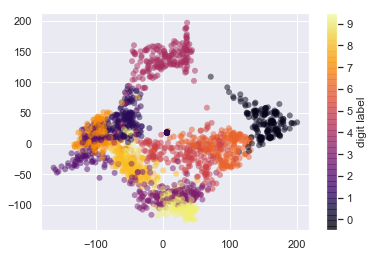

In [28]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
           edgecolor='none', alpha=0.5,
           cmap='inferno')
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on digits

In [29]:
# Split the data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=21)

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [31]:
# Score for our predictions
from sklearn.metrics import accuracy_score
accuracy_score(y_model, ytest)

0.8311111111111111

To where we are wrong, use confusion matrix

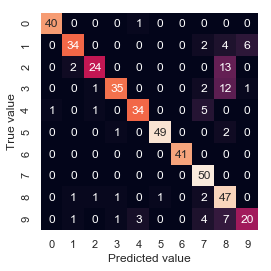

In [32]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted value')
plt.ylabel('True value');

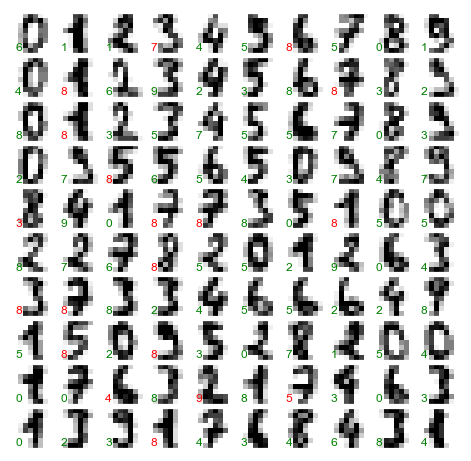

In [33]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')